__Cargar librerías__

In [1]:
import os
import sys
import getpass
import bz2
import pickle # Rick!
import copy

import numpy as np
import pandas as pd
import math

import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import loadmat
import matplotlib.pyplot as plt

from sklearn.feature_selection import f_regression, mutual_info_regression, RFE
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

__Cargar datos__

In [2]:
df = pd.read_csv("../../Data/csv/temp_split/train_data.csv")

ncols = df.shape[1]

X = df.iloc[:,:-1]
y = df["vs"]

__Comprobar si hay NAs__

In [3]:
pd.isnull(df).values.any()

False

__Get a summary of all variables__

In [4]:
df.describe()

,qp_ra,sa,hr,at,st,td,gr,ws,wd,ap,vs
count,13400.000000,13400.000000,13400.000000,13400.000000,13400.000000,13400.000000,13400.000000,13400.000000,13400.000000,13400.000000,13400.000000
mean,1.822037,0.715093,91.774502,9.737669,13.746965,8.239800,143.799235,5.957029,193.540516,1019.643221,1364.516735
std,4.719696,6.927734,13.622739,4.973550,9.578354,4.893425,218.843253,3.998089,97.750025,8.967315,848.253169
min,0.000000,0.000000,21.000000,-4.685000,-2.585000,-10.308333,9.083333,0.000000,1.250000,975.000000,21.000000
25%,0.000000,0.000000,88.000000,5.890417,6.813958,4.562292,9.750000,3.225000,153.833333,1016.000000,204.166667
50%,0.100000,0.000000,100.000000,9.338333,11.969583,7.805000,17.250000,5.083333,173.666667,1021.000000,2000.000000
75%,0.900000,0.000000,100.000000,13.440000,17.929792,12.195000,194.020833,7.475000,268.333333,1025.083333,2000.000000
max,48.741667,100.000000,100.000000,29.925833,58.206667,23.032500,1140.500000,27.350000,357.500000,1039.833333,2000.000000


__Ver los histogramas de las variables__

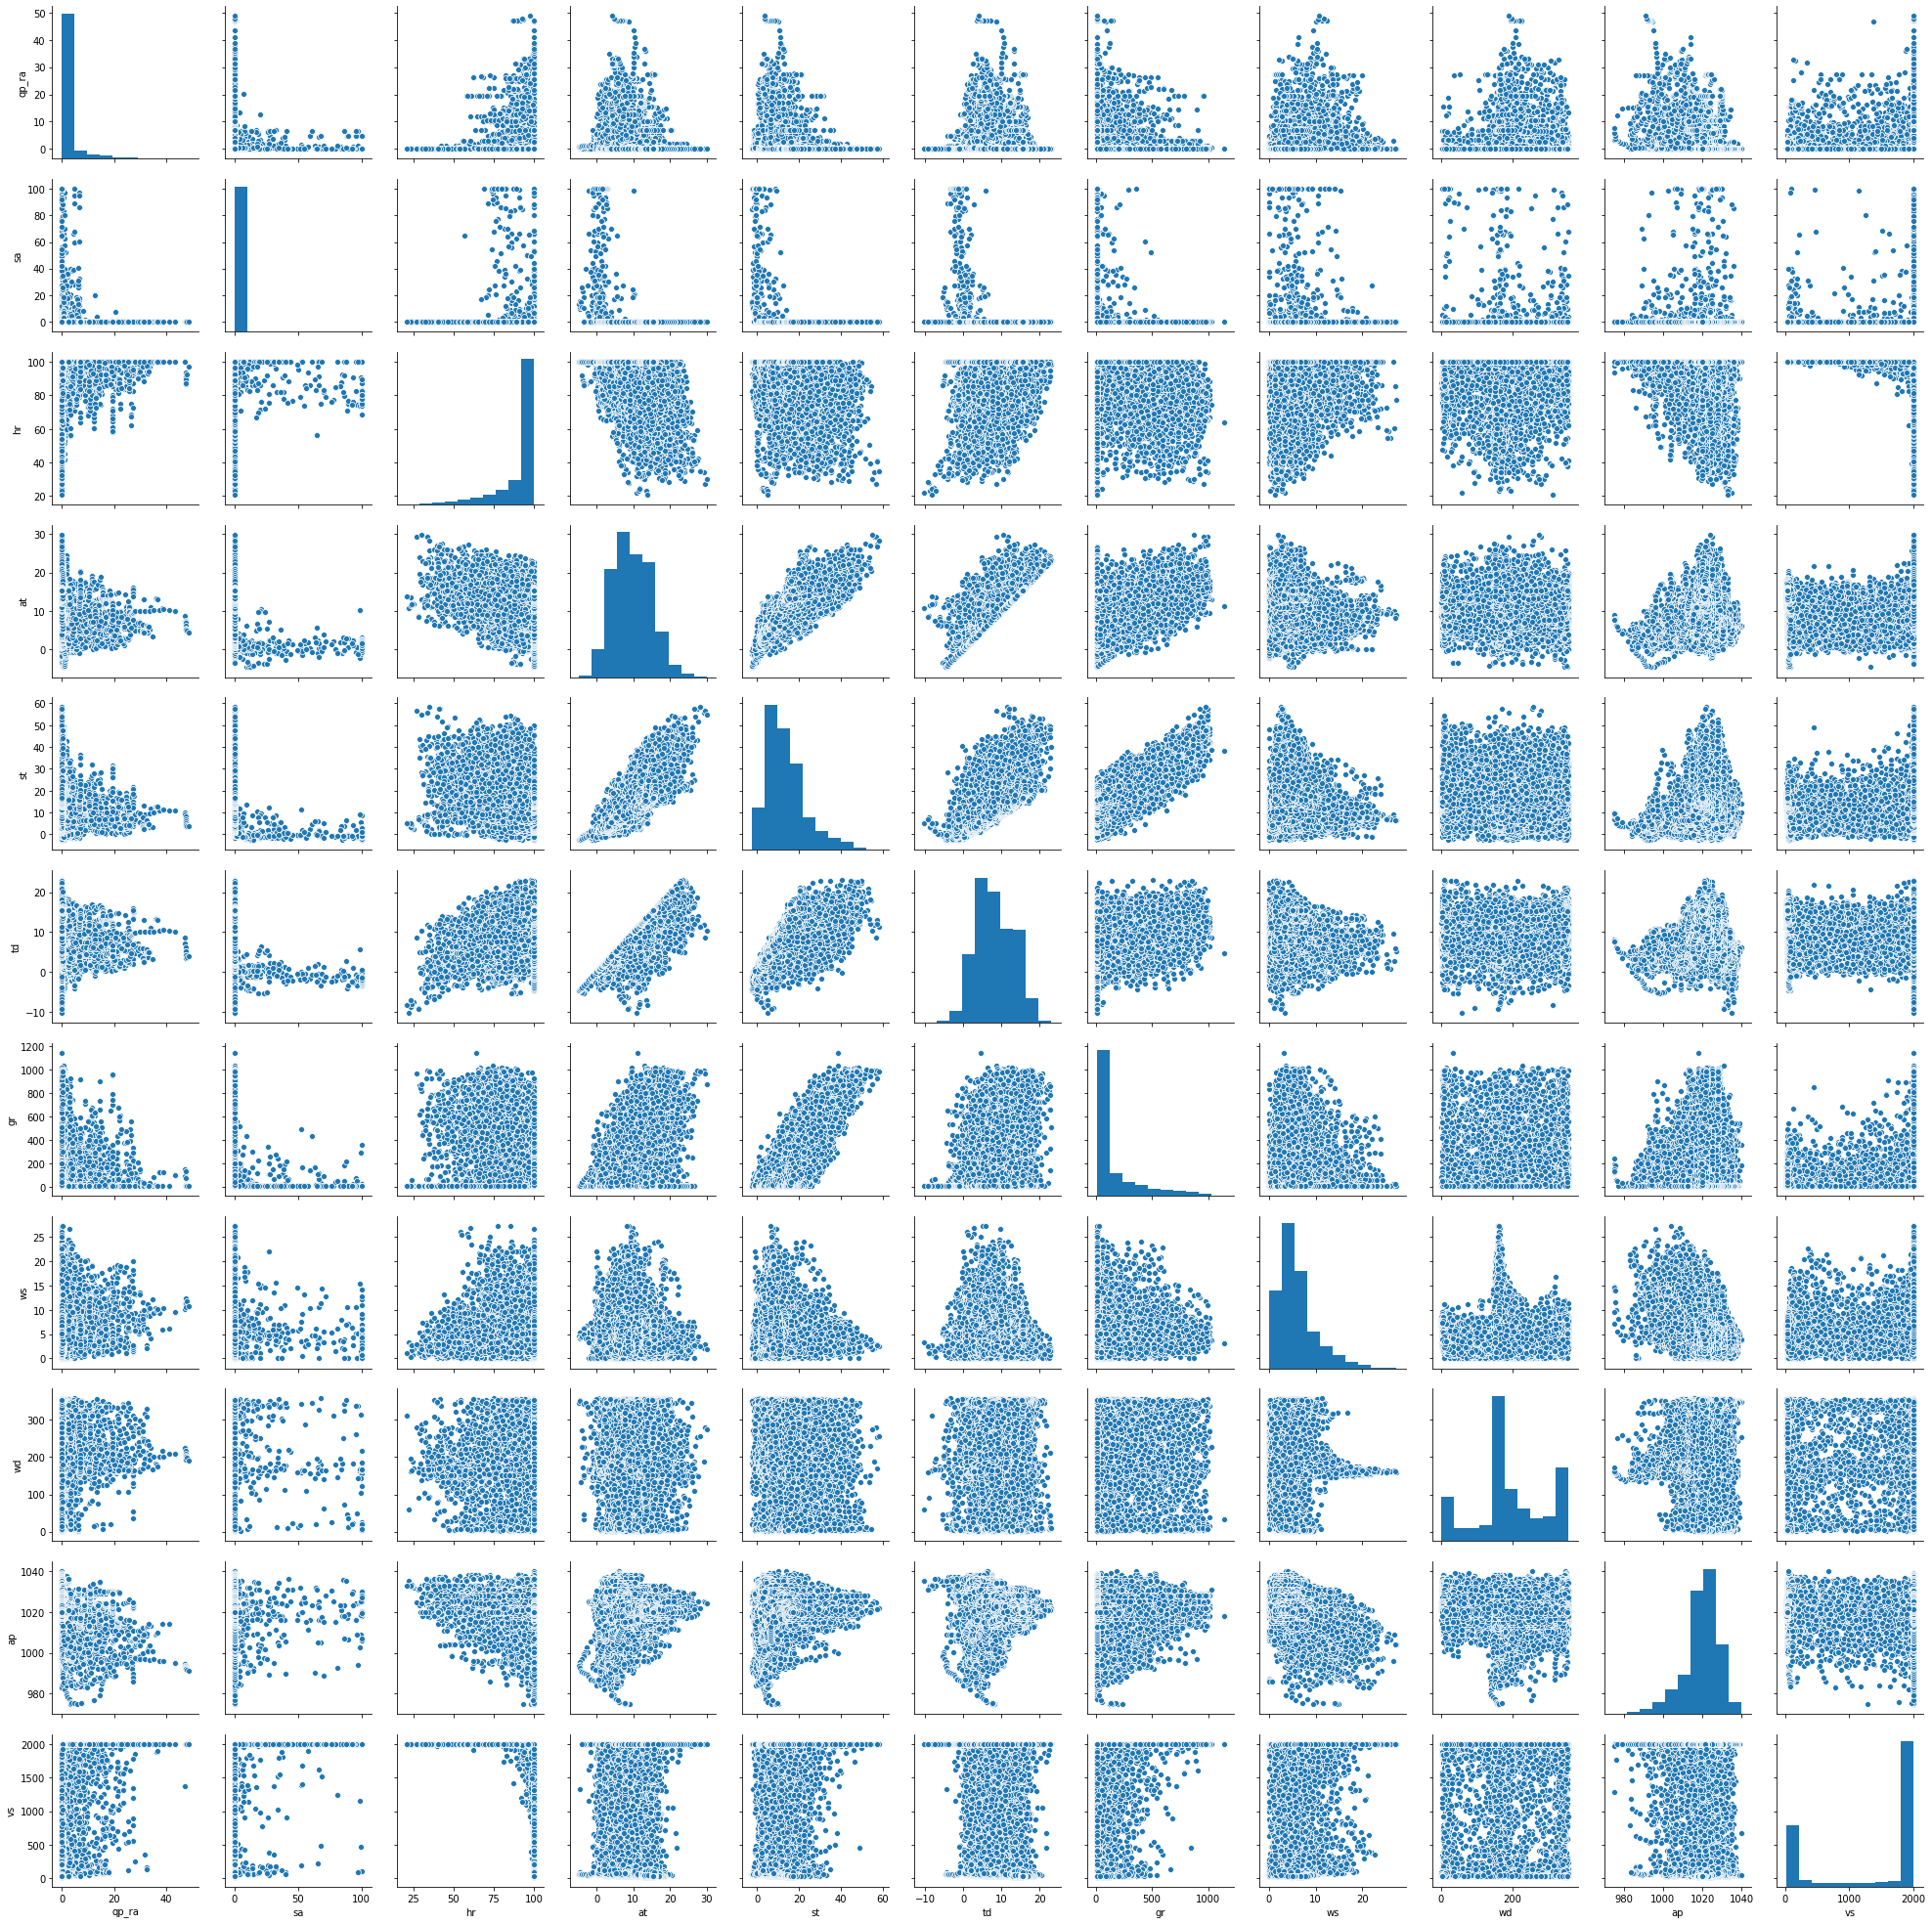

In [5]:
sns.pairplot(df);

__Sacar boxplots de las variables__

In [13]:
%matplotlib notebook

<IPython.core.display.Javascript object>


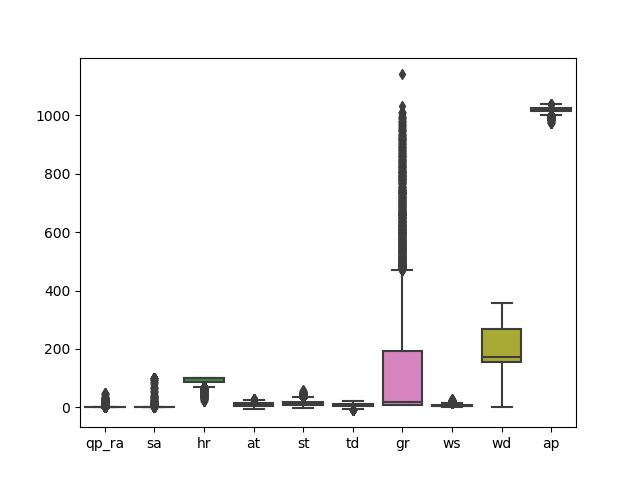

In [14]:
sns.boxplot(data=X);

<IPython.core.display.Javascript object>


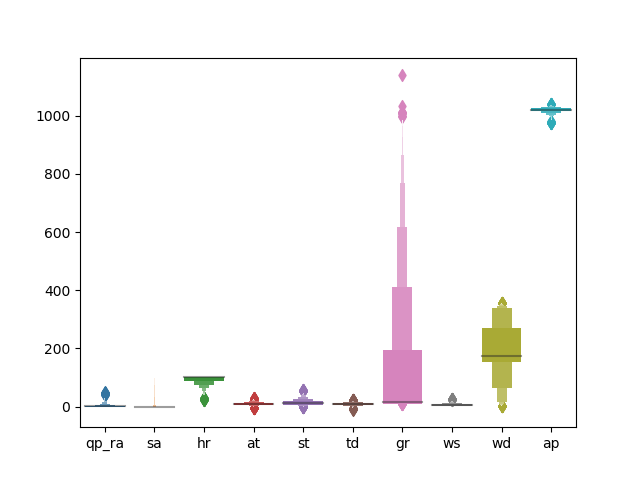

In [15]:
sns.boxenplot(data=X);

<IPython.core.display.Javascript object>


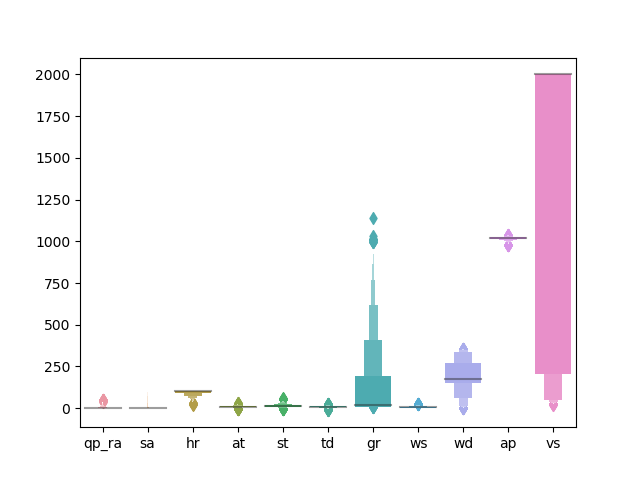

In [16]:
sns.boxenplot(data=df);

__Comprobar sparsity por variables__

Las variables de salinidad tienen más un 97% de valores 0. Las de acumulación de precipitación en torno a un 30%.

In [9]:
(df == 0).mean()

qp_ra    0.464104
sa       0.976269
hr       0.000000
at       0.000000
st       0.000000
td       0.000000
gr       0.000000
ws       0.004179
wd       0.000000
ap       0.000000
vs       0.000000
dtype: float64

__Ver la selección de características que realizan varios métodos__

In [10]:
f_reg = list(f_regression(X,y))
mut_inf = mutual_info_regression(X,y)
rfe_gb = RFE(GradientBoostingRegressor())
rfe_gb.fit(X,y);
rfe_lm = RFE(LinearRegression())
rfe_lm.fit(X,y);

In [11]:
vars_ = list(df.columns)[:-1]
pd.DataFrame([*f_reg, mut_inf, rfe_gb.ranking_, rfe_lm.ranking_], columns=vars_,
             index=["f_reg=f_values","f_reg=p-values","mut_inf","RFE_lm", "RFE_gb"])

,qp_ra,sa,hr,at,st,td,gr,ws,wd,ap
f_reg=f_values,2.889786e+02,21.879653,3418.111669,7.139640e+01,7.786349e+01,1.338379e+03,1.431101e+03,2.430260e+02,6.427332e+01,1.962158e+02
f_reg=p-values,3.898363e-64,0.000003,0.000000,3.221046e-17,1.239409e-18,2.238834e-279,1.225776e-297,2.580680e-54,1.172304e-15,2.869405e-44
mut_inf,8.086382e-02,0.002157,0.388771,1.182087e-01,1.288926e-01,1.314989e-01,7.314252e-02,6.668221e-02,1.050736e-01,6.774554e-02
RFE_lm,1.000000e+00,6.000000,1.000000,5.000000e+00,1.000000e+00,4.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
RFE_gb,1.000000e+00,4.000000,1.000000,1.000000e+00,2.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,6.000000e+00,3.000000e+00


In [18]:
np.sqrt(rfe_gb.estimator_.train_score_.mean())

518.156597775043